## Programming Project 
# Industrial Organizations: An Data Science Perspective

Please write the names and school ID of **all** group members and your gruop number.

Group number:

Group members:
- Name 1 (      )      
- School ID 1
- Name 2 (      )        
- School ID 2
- Name 3 (      )        
- School ID 3
- Name 4 (      )        
- School ID 4
- Name 5 (      )        
- School ID 5

*Deadline*: 2025-11-16 23:59:59

You are handling a dataset concerning the customers and product attributes of
cellphones.

### **IMPORTANT NOTE**:
Please provide a clear and concise explanation for each result you obtain. If the outcome differs from your expectations, try to analyze the situation and describe why the result might have turned out that way. Consider factors such as possible errors, incorrect assumptions, or unexpected behavior in the system or process you're working with. By doing this, you'll help us better understand your reasoning and problem-solving approach, which will allow us to offer partial credit if an error was made or if your analysis demonstrates an understanding of the underlying concepts despite the incorrect result.

In [2]:
%pip install -q pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set(style='whitegrid', context='notebook')
RANDOM_STATE = 42

df = pd.read_csv('smartphone_customer_data.csv')
df.head()

,gender,height,handsize,age,gaming,chat,maps,video,social,reading,total_minutes,days_ago,years_ago,discount,phone_id,brand,size_cat,price,screen_size
0,female,71.0,7.88,20,316.436544,281.938305,77.016074,499.804480,176.045230,93.409135,1444.649767,852.767251,3,NaN,H2,huawei,l,699.0,5.7
1,male,64.6,5.63,20,441.510740,163.202311,17.496274,587.558106,104.325127,62.280162,1376.372721,834.474822,3,H1,H2,huawei,l,699.0,5.7
2,male,66.8,7.50,20,244.726902,361.834186,142.569650,356.602749,318.795082,82.700541,1507.229110,947.657208,3,S2,A1,apple,s,749.0,5.5
3,male,67.3,5.97,19,385.905312,201.970353,82.730194,537.893285,244.429449,116.935911,1569.864505,400.641410,2,S1,H1,huawei,s,699.0,5.7
4,male,68.1,6.71,19,204.243493,407.604492,143.676724,241.993243,344.192753,67.492025,1409.202730,555.876603,2,A1,S1,samsung,s,749.0,5.8


## Descriptive Exploration of the dataset

In this part, use Panda, Matplotlib and Seaborn to explore the dataset. You can use the code from 
the lectures as a starting point.
There are three two things that you need to pay attention in this part:
1. Handle the missing values.
2. Provide the summary statistics of the dataset.
3. Explore some correlation between the variables that you think are important.

In [6]:
missing = pd.DataFrame({
    '缺失值数量': df.isnull().sum(),
    '缺失值比例': df.isnull().sum() / len(df)
})
print("\n缺失值统计：")
display(missing[missing['缺失值数量'] > 0].sort_values('缺失值比例', ascending=False))  # 只显示有缺失的列


缺失值统计：


,缺失值数量,缺失值比例
discount,1500,0.5


C:\Users\A\AppData\Local\Temp\ipykernel_7676\4064453140.py:5: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from current font.
  plt.tight_layout()
C:\Users\A\AppData\Local\Temp\ipykernel_7676\4064453140.py:5: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  plt.tight_layout()
C:\Users\A\AppData\Local\Temp\ipykernel_7676\4064453140.py:5: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
C:\Users\A\AppData\Local\Temp\ipykernel_7676\4064453140.py:5: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
C:\Users\A\AppData\Local\Temp\ipykernel_7676\4064453140.py:5: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  plt.tight_layout()
C:\Users\A\AppData\Local\Temp\ipykernel_7676\4064453140.py:5: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from current font.
  plt.tight_l

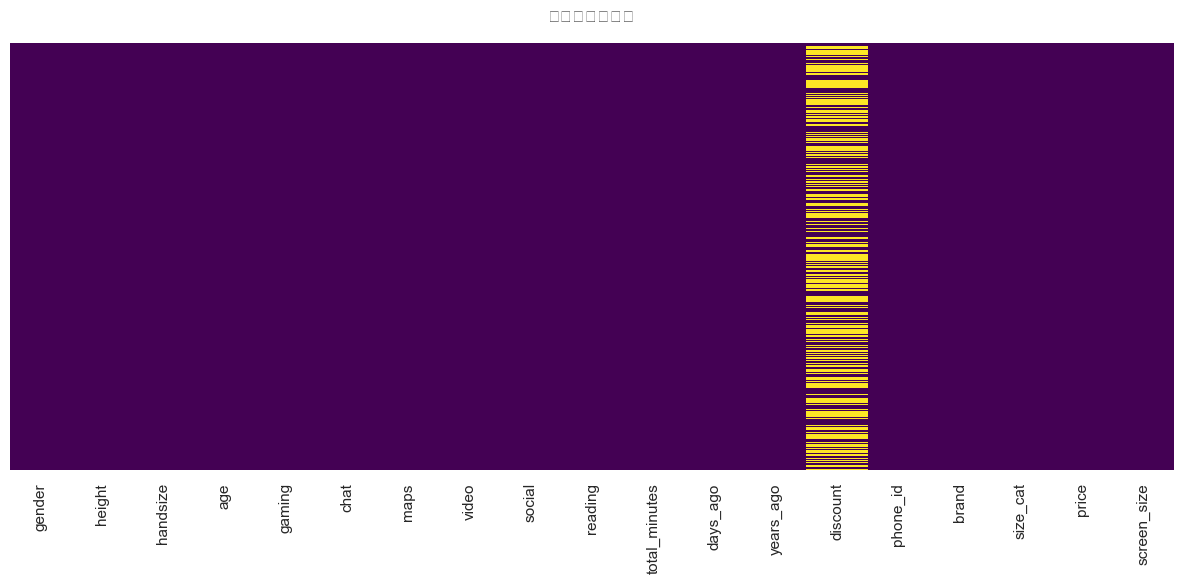


缺失值处理完成：数值型用均值填充，类别型添加'为零'类别并填充缺失值


C:\Users\A\AppData\Local\Temp\ipykernel_7676\4064453140.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


In [7]:
# 可视化缺失值分布
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('缺失值分布热图', pad=15)
plt.tight_layout()
plt.show()

# 根据缺失比例处理缺失值（分数值型和类别型）
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# 数值型特征：用均值填充
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 类别型特征：添加"为零"类别并用其填充缺失值
for col in categorical_cols:
    if df[col].isnull().any():
        # 确保"为零"类别存在于特征中（对于category类型需要显式添加类别）
        if pd.api.types.is_categorical_dtype(df[col]):
            df[col] = df[col].cat.add_categories("NO")
        # 用"为零"填充缺失值
        df[col] = df[col].fillna("NO")

print("\n缺失值处理完成：数值型用均值填充，类别型添加'为零'类别并填充缺失值")

In [8]:
# 3. 描述性统计分析
# ----------------------
# 数值型特征的 summary 统计（均值、标准差、分位数等）
print("\n数值型特征的描述性统计：")
display(df[numeric_cols].describe().round(2))

# 类别型特征的统计（计数、频率）
print("\n类别型特征的分布统计：")
for col in categorical_cols:
    print(f"\n{col} 分布：")
    count = df[col].value_counts()
    freq = df[col].value_counts(normalize=True).round(3) * 100  # 百分比
    display(pd.DataFrame({'计数': count, '频率(%)': freq}))


数值型特征的描述性统计：


,height,handsize,age,gaming,chat,maps,video,social,reading,total_minutes,days_ago,years_ago,price,screen_size
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,66.54,7.11,20.05,240.75,268.52,115.05,369.32,183.63,128.76,1306.02,553.48,2.01,790.35,5.91
std,4.52,1.17,1.31,148.63,107.20,77.61,127.00,105.90,106.07,186.19,317.78,0.81,82.10,0.31
min,52.00,3.10,18.00,0.00,0.00,0.00,118.07,0.00,0.00,540.90,1.10,1.00,539.10,5.20
25%,63.40,6.32,19.00,131.41,183.00,61.23,262.11,103.96,51.98,1189.20,281.48,1.00,749.00,5.80
50%,66.80,7.12,20.00,221.90,255.80,97.72,343.93,158.36,104.42,1300.88,555.97,2.00,799.00,5.80
75%,69.80,7.89,21.00,343.76,353.04,143.12,468.42,258.47,177.78,1429.38,837.41,3.00,849.00,6.10
max,79.80,11.39,24.00,742.60,617.46,467.30,850.12,520.37,537.82,1914.51,1094.79,3.00,999.00,6.80



类别型特征的分布统计：

gender 分布：


,计数,频率(%)
gender,,
female,1552,51.7
male,1448,48.3



discount 分布：


,计数,频率(%)
discount,,
NO,1500,50.0
H1,330,11.0
H2,330,11.0
S2,240,8.0
S1,240,8.0
A1,180,6.0
A2,180,6.0



phone_id 分布：


,计数,频率(%)
phone_id,,
A1,800,26.7
S1,741,24.7
A2,515,17.2
S2,334,11.1
H2,321,10.7
H1,289,9.6



brand 分布：


,计数,频率(%)
brand,,
apple,1315,43.8
samsung,1075,35.8
huawei,610,20.3



size_cat 分布：


,计数,频率(%)
size_cat,,
s,1830,61.0
l,1170,39.0


D:\software\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


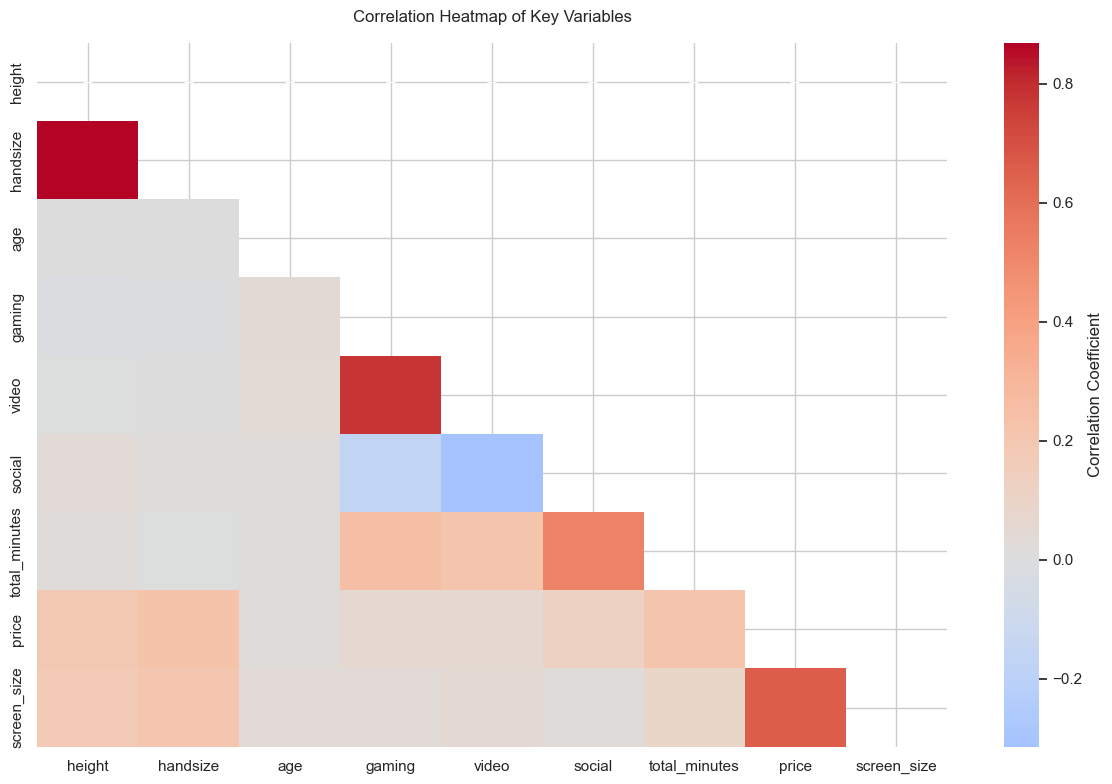

D:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

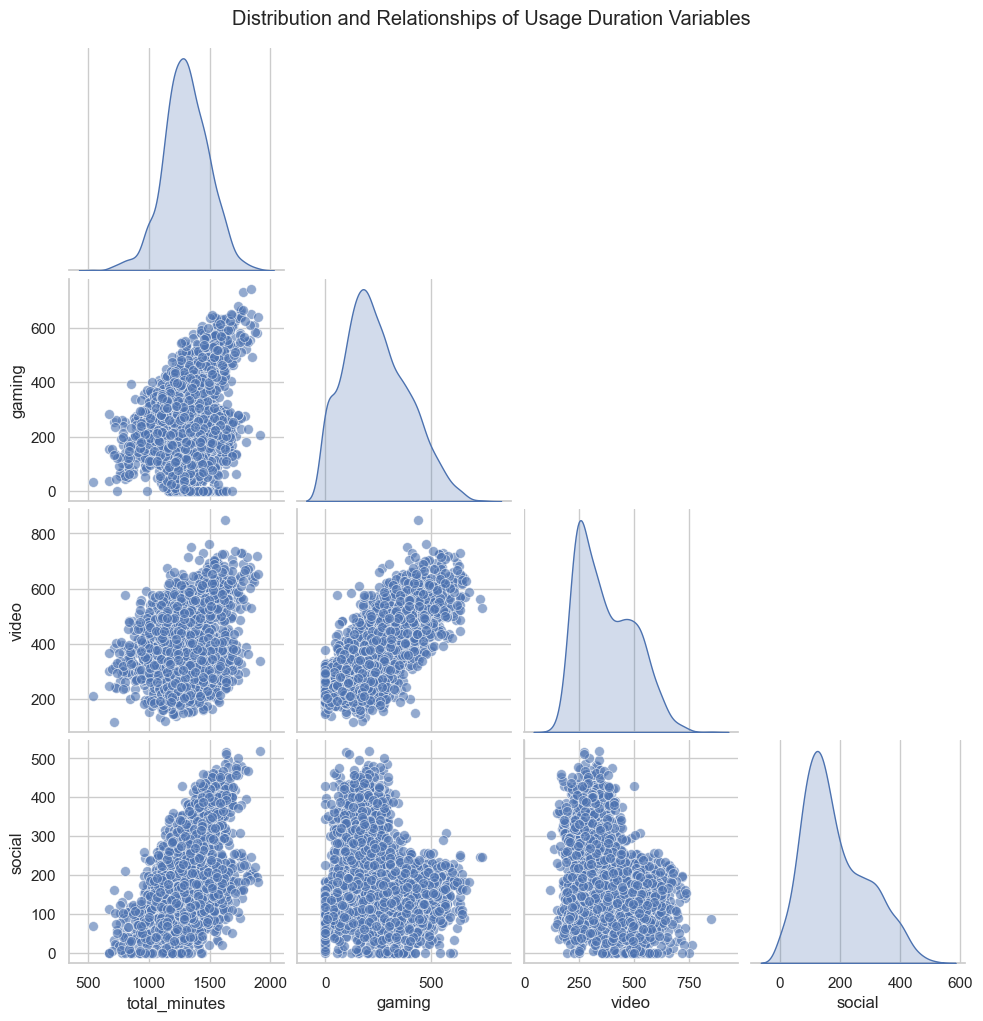

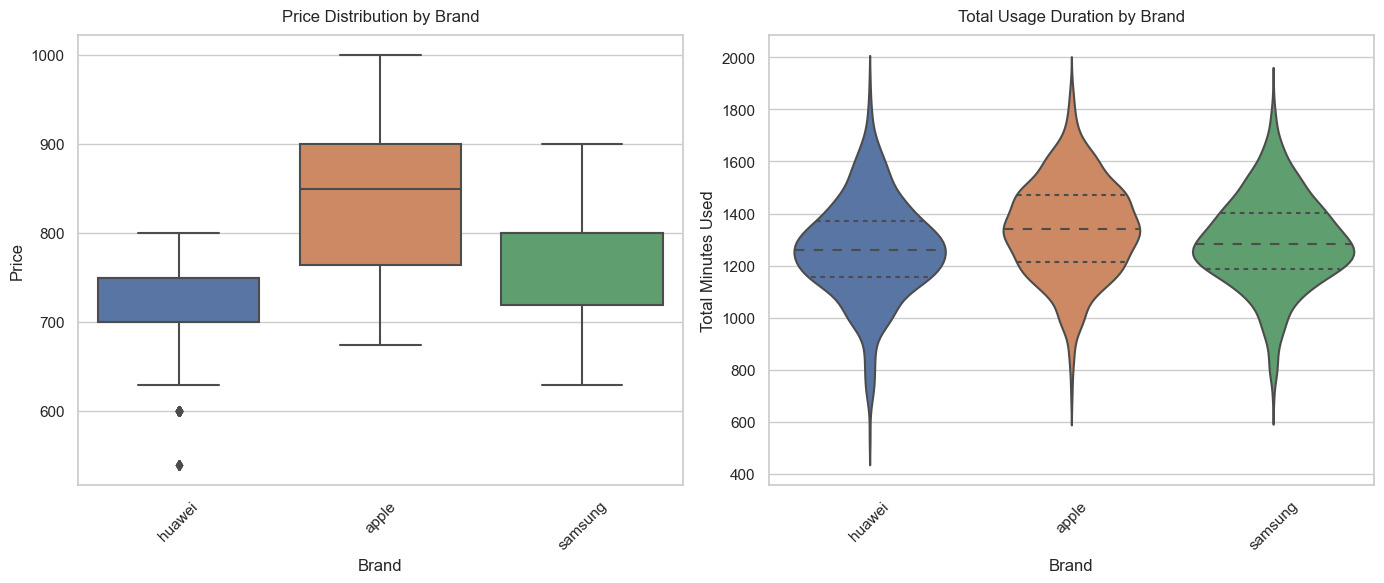

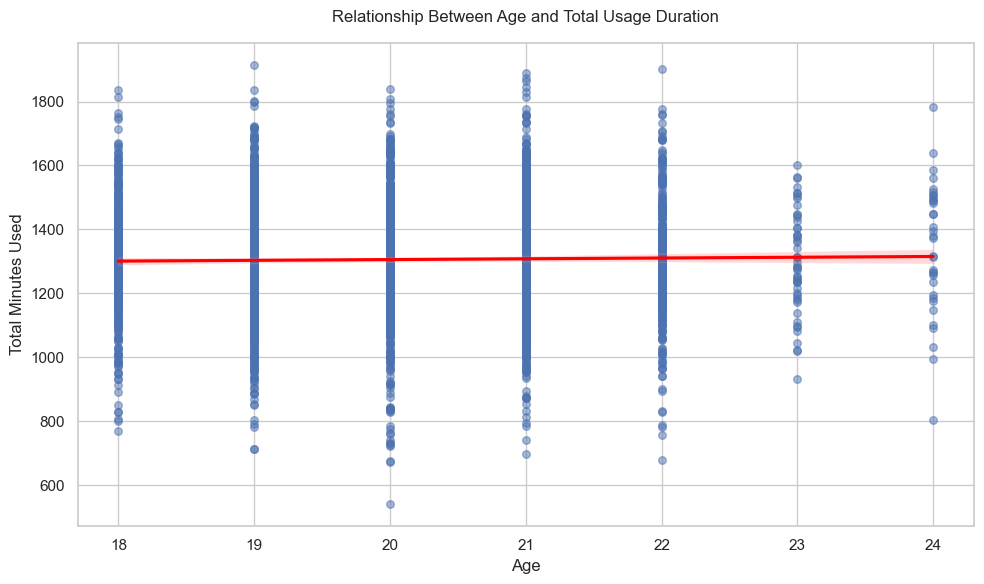

In [9]:
# 4. Exploration of Key Variable Correlations
# ----------------------
# Select potentially relevant numeric variables (based on business logic)
# e.g.: user attributes (height, hand size, age), usage behavior (app durations, total duration), device attributes (price, screen size)
focus_vars = [
    'height', 'handsize', 'age', 
    'gaming', 'video', 'social', 'total_minutes', 
    'price', 'screen_size'
]

# 1) Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df[focus_vars].corr()  # Calculate Pearson correlation coefficients
mask = np.triu(np.ones_like(corr, dtype=bool))  # Show only lower triangle
sns.heatmap(
    corr, 
    mask=mask, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    center=0, 
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Key Variables', pad=15)
plt.tight_layout()
plt.show()

# 2) Distribution and relationships of numeric variables (pairplot for key variables)
# Visualize 4 variables with high correlation or business importance
sns.pairplot(
    df, 
    vars=['total_minutes', 'gaming', 'video', 'social'],  # Total usage vs individual app durations
    diag_kind='kde',  # Use kernel density plot for diagonals
    corner=True,  # Show only lower triangle
    plot_kws={'alpha': 0.6, 's': 50},
    diag_kws={'fill': True}
)
plt.suptitle('Distribution and Relationships of Usage Duration Variables', y=1.02)
plt.show()

# 3) Relationship between categorical and numeric variables (using brand to analyze price and usage duration)
if 'brand' in df.columns:
    plt.figure(figsize=(14, 6))
    
    # Price distribution across brands
    plt.subplot(1, 2, 1)
    sns.boxplot(x='brand', y='price', data=df)
    plt.title('Price Distribution by Brand', pad=10)
    plt.xticks(rotation=45)
    plt.xlabel('Brand')
    plt.ylabel('Price')
    
    # Total usage duration across brands
    plt.subplot(1, 2, 2)
    sns.violinplot(x='brand', y='total_minutes', data=df, inner='quartile')
    plt.title('Total Usage Duration by Brand', pad=10)
    plt.xticks(rotation=45)
    plt.xlabel('Brand')
    plt.ylabel('Total Minutes Used')
    
    plt.tight_layout()
    plt.show()

# 4) Relationship between age and usage behavior (scatter plot with regression line)
plt.figure(figsize=(10, 6))
sns.regplot(
    x='age', 
    y='total_minutes', 
    data=df, 
    scatter_kws={'alpha': 0.5, 's': 30},
    line_kws={'color': 'red'}
)
plt.title('Relationship Between Age and Total Usage Duration', pad=15)
plt.xlabel('Age')
plt.ylabel('Total Minutes Used')
plt.tight_layout()
plt.show()

## K-Means Clustering

In this part, you need to use K-Means clustering to do a custermer segmentation with the variable video and gaming and the K is set to be 4.
You need to finish the following tasks:
1. Standardize the dataset.
2. Run K-Means clustering with k=4 and the two variables of your choice(Give short disucssion why you choose these two variables).
3. Plot the clustering results.
4. Provide a discussion of the market segmentation based on the clustering results.


In [17]:
#1.Standardize the dataset.
selected_vars = ['height','handsize','age','gaming','chat','maps','video',
            'social','reading','total_minutes','days_ago','years_ago','price','screen_size']
X = df[selected_vars].copy()
X.head()

,height,handsize,age,gaming,chat,maps,video,social,reading,total_minutes,days_ago,years_ago,price,screen_size
0,71.0,7.88,20,316.436544,281.938305,77.016074,499.804480,176.045230,93.409135,1444.649767,852.767251,3,699.0,5.7
1,64.6,5.63,20,441.510740,163.202311,17.496274,587.558106,104.325127,62.280162,1376.372721,834.474822,3,699.0,5.7
2,66.8,7.50,20,244.726902,361.834186,142.569650,356.602749,318.795082,82.700541,1507.229110,947.657208,3,749.0,5.5
3,67.3,5.97,19,385.905312,201.970353,82.730194,537.893285,244.429449,116.935911,1569.864505,400.641410,2,699.0,5.7
4,68.1,6.71,19,204.243493,407.604492,143.676724,241.993243,344.192753,67.492025,1409.202730,555.876603,2,749.0,5.8


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.98695367,  0.66061517, -0.0353612 ,  0.5093238 ,  0.12515128,
        -0.4901369 ,  1.02759291, -0.07159705, -0.33331895,  0.74469043,
         0.94197629,  1.21202679, -1.11289708, -0.68211294],
       [-0.42999107, -1.26115992, -0.0353612 ,  1.35095186, -0.98259547,
        -1.25719101,  1.7186665 , -0.74894895, -0.62683882,  0.37791407,
         0.88440301,  1.21202679, -1.11289708, -0.68211294],
       [ 0.05708369,  0.33604871, -0.0353612 ,  0.02678745,  0.87053944,
         0.35467678, -0.10014321,  1.2765868 , -0.43429193,  1.0808594 ,
         1.24063133,  1.21202679, -0.50377112, -1.32561572]])

In [19]:
#2.Run K-Means clustering with k=4 and the two variables of your choice
kmeans = KMeans(
    n_clusters=4,
    random_state=42,
    n_init=50
)
clusters = kmeans.fit_predict(X_scaled)
#将簇标签加入原数据框，方便后续分析
df["cluster"]=clusters
df['cluster'].value_counts().sort_index()

D:\software\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


cluster
0    547
1    686
2    847
3    920
Name: count, dtype: int64

## Principal Component Analysis

Use PCA to reduce the dimension of *product attributes space* to two dimensions, then plot the data points in the new space.
One optional task is to color the data points based on the cluster they belong to in the previous part.


,PC,ExplainedVar,Cumulative
0,PC1,0.247,0.247
1,PC2,0.210,0.457
2,PC3,0.145,0.601
3,PC4,0.135,0.736
4,PC5,0.074,0.810
5,PC6,0.071,0.881
6,PC7,0.049,0.930
7,PC8,0.019,0.949
8,PC9,0.014,0.963
9,PC10,0.013,0.976


D:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

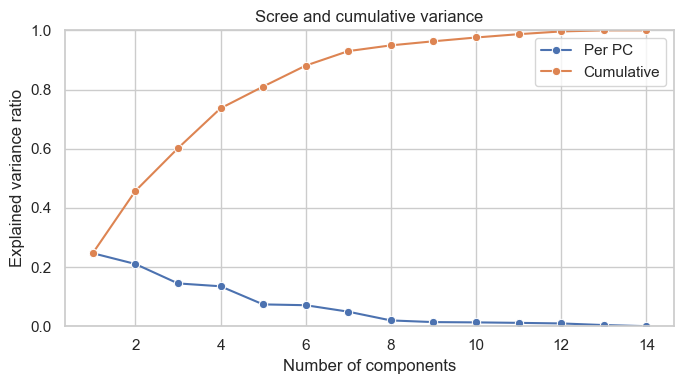

(7, 9)

In [20]:
pca = PCA(n_components=None, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)
evr = pca.explained_variance_ratio_
cum = evr.cumsum()
var_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(evr))],
    'ExplainedVar': evr,
    'Cumulative': cum
})
display(var_df.round(3))
plt.figure(figsize=(7,4))
sns.lineplot(x=np.arange(1,len(evr)+1), y=evr, marker='o', label='Per PC')
sns.lineplot(x=np.arange(1,len(evr)+1), y=cum, marker='o', label='Cumulative')
plt.axhline(0, color='gray', lw=0.5)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree and cumulative variance')
plt.ylim(0,1)
plt.legend()
plt.tight_layout(); plt.show()
n90 = int(np.argmax(cum >= 0.90) + 1)
n95 = int(np.argmax(cum >= 0.95) + 1)
n90, n95


In [21]:
# 2. PCA降维（重点保留2个主成分）
# ----------------------
# 先拟合完整PCA以获取方差解释率
pca_full = PCA(n_components=None, random_state=RANDOM_STATE)
pca_full.fit(X_scaled)
evr = pca_full.explained_variance_ratio_

# 提取前2个主成分用于可视化
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

# 输出降维信息
print(f"\nPCA降维结果：")
print(f"PC1解释方差：{evr[0]:.2%} | PC2解释方差：{evr[1]:.2%}")
print(f"累计解释方差：{evr[0]+evr[1]:.2%}")


PCA降维结果：
PC1解释方差：24.66% | PC2解释方差：21.02%
累计解释方差：45.69%


In [26]:
# 3. 准备可视化数据
# ----------------------
pc_df = pd.DataFrame(
    X_pca, 
    columns=['PC1', 'PC2']
)

# 整合聚类标签
cluster_cols = [col for col in df.columns if col in ['segment_true', 'cluster']]
if cluster_cols:
    cluster_col = cluster_cols[0]
    pc_df['cluster'] = df[cluster_col].astype(str)  # 转换为字符串类型
    print(f"已添加聚类标签列：{cluster_col}")
else:
    pc_df['Cluster'] = 'All'  # 无聚类时统一标签
    print("未检测到聚类标签，所有点使用同一颜色")


已添加聚类标签列：cluster


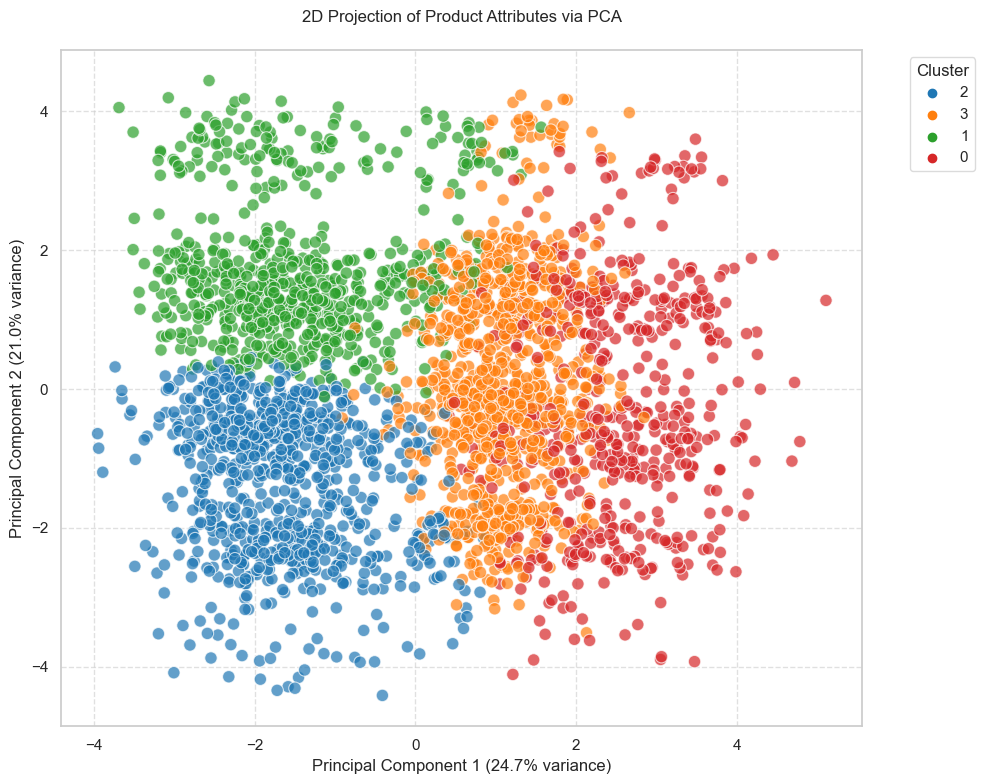

In [27]:
# ----------------------
# 4. 二维PCA结果可视化
# ----------------------
plt.figure(figsize=(10, 8))

# 确保PCA结果数据框(pc_df)中也包含簇标签（如果pc_df是独立数据框）
# 如果pc_df是从df转换来的，可能需要先合并簇标签：
# pc_df = pc_df.join(df['cluster'])  # 根据实际情况调整

# 绘制散点图（修正hue参数为小写cluster）
scatter = sns.scatterplot(
    data=pc_df,
    x='PC1',
    y='PC2',
    hue='cluster',  # 与数据框中的列名保持一致（小写）
    palette='tab10' if len(pc_df['cluster'].unique()) > 1 else 'deep',  # 同样修正列名
    s=80,  # 点大小
    alpha=0.7,
    edgecolor='white',
    linewidth=0.8
)

# 添加标签和标题（含方差解释率）
plt.xlabel(f'Principal Component 1 ({evr[0]*100:.1f}% variance)')
plt.ylabel(f'Principal Component 2 ({evr[1]*100:.1f}% variance)')
plt.title('2D Projection of Product Attributes via PCA', pad=20)

# 优化图例
if len(pc_df['cluster'].unique()) > 1:  # 修正列名
    plt.legend(
        title='Cluster',  # 图例标题可以用大写
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        frameon=True,
        edgecolor='lightgray'
    )

# 添加网格线
plt.grid(linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


前2个主成分的特征载荷（绝对值越大，影响越强）：


,PC1,PC2
height,0.014,0.133
handsize,0.009,0.143
age,-0.034,0.029
gaming,-0.474,0.034
chat,0.386,0.063
maps,0.439,-0.009
video,-0.466,0.027
social,0.181,0.074
reading,0.423,-0.016
total_minutes,0.053,0.111


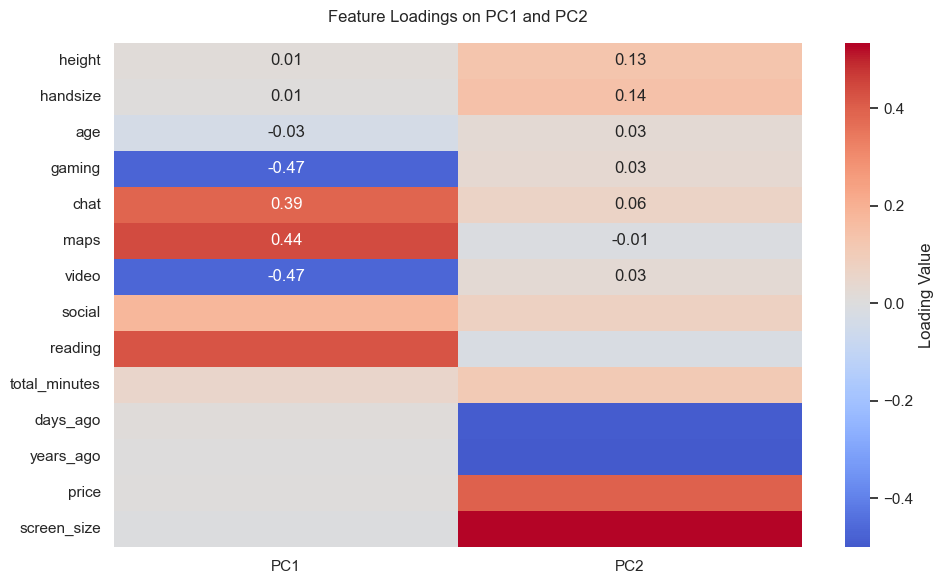

In [29]:
# 5. 主成分载荷辅助解释（可选）
# ----------------------
# 显示前2个主成分的载荷，解释维度含义
loadings = pd.DataFrame(
    pca.components_.T,
    index=selected_vars ,
    columns=['PC1', 'PC2']
)

print("\n前2个主成分的特征载荷（绝对值越大，影响越强）：")
display(loadings.round(3))

# 载荷热图可视化
plt.figure(figsize=(10, 6))
sns.heatmap(
    loadings,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Loading Value'}
)
plt.title('Feature Loadings on PC1 and PC2', pad=15)
plt.tight_layout()
plt.show()

## Bonus Questions(Optional):

This part is not required for every group. If you want to give a bonus points  to your project, you can try to do the following things:
1. Use regression to build a model to predict the demand of customers.
2. Based on the regression model you build, make some suggestions to the company on how to optimally set their price to maximize their profit.
3. If you have any other ideas about how to use the knowledge you learned for the analysis of this dataset, you can impletment them, but please explain your ideas clearly.